In [1]:
# Installing two python libraries
!pip install sqlalchemy psycopg2-binary 



In [2]:
# Importing in order to use
import sqlalchemy
import psycopg2



In [3]:
# Import specific function
from sqlalchemy import create_engine


In [4]:
# Import pandas 
import pandas as pd


In [5]:
# Upload the dataset
df = pd.read_csv("C:\\Users\\Khin\\Downloads\\Google Ads sales dataset\\GoogleAds_DataAnalytics_Sales_Uncleaned.csv")

# To identify the dataset_A
df.shape 


(2600, 13)

In [6]:
df.head(5) # A

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024/11/16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,hyderabad,desktop,online data analytic


In [7]:
df.nunique() # A

Ad_ID              2600
Campaign_Name         4
Clicks              120
Impressions        1702
Cost               2106
Leads                21
Conversions           8
Conversion Rate     105
Sale_Amount         921
Ad_Date              90
Location              4
Device                9
Keyword               6
dtype: int64

In [8]:
# A
print(df.Location.unique())
print(df.Device.unique())
print(df.Campaign_Name.unique())
print(df.Keyword.unique())

['hyderabad' 'HYDERABAD' 'Hyderbad' 'hydrebad']
['desktop' 'mobile' 'Desktop' 'tablet' 'MOBILE' 'TABLET' 'Tablet' 'Mobile'
 'DESKTOP']
['DataAnalyticsCourse' 'Data Anlytics Corse' 'Data Analytcis Course'
 'Data Analytics Corse']
['learn data analytics' 'data analytics course' 'data analitics online'
 'data anaytics training' 'online data analytic' 'analytics for data']


In [9]:
# Modify the typos
loation_typo= {
    'hyderabad' : 'Hyderabad',
    'HYDERABAD':'Hyderabad',
    'Hyderbad':'Hyderabad',
    'hydrebad': 'Hyderabad'}

device_typo= {'desktop' :'Desktop',
    'DESKTOP':'Desktop',
   'mobile' :'Mobile',
    'MOBILE':'Mobile',
    'TABLET':'Tablet',
    'tablet':'Tablet'
}

Campaign_Name_typo={
  'DataAnalyticsCourse'  : 'Data Analytics Course',
   'Data Anlytics Corse' : 'Data Analytics Course',
   'Data Analytcis Course' : 'Data Analytics Course',
   'Data Analytics Corse' : 'Data Analytics Course',
}

Keyword_typo= {
   'data analitics online' : 'data analytics online',
   'data anaytics training' : 'data analytics training',
    'online data analytic' : 'online data analytics'
    
}

df.replace(loation_typo, inplace= True)
df.replace(device_typo, inplace= True)
df.replace(Campaign_Name_typo, inplace= True)
df.replace(Keyword_typo, inplace= True)

print(df.Location.nunique()),
print(df.Device.nunique()),
print(df.Campaign_Name.nunique())
print(df.Keyword.nunique())


print(df.Location.unique())
print(df.Device.unique())
print(df.Campaign_Name.unique())
print(df.Keyword.unique())

1
3
1
6
['Hyderabad']
['Desktop' 'Mobile' 'Tablet']
['Data Analytics Course']
['learn data analytics' 'data analytics course' 'data analytics online'
 'data analytics training' 'online data analytics' 'analytics for data']


In [10]:
print(df['Ad_Date'].head())

0    2024-11-16
1    20-11-2024
2    2024/11/16
3    2024-11-26
4    2024-11-22
Name: Ad_Date, dtype: object


In [11]:
print(df['Ad_Date'].dtype)

object


In [12]:
# Use .unique() to find inconsistent 
df.Ad_Date.unique()

array(['2024-11-16', '20-11-2024', '2024/11/16', '2024-11-26',
       '2024-11-22', '16-11-2024', '06-11-2024', '2024/11/24',
       '2024/11/12', '14-11-2024', '2024/11/22', '2024/11/27',
       '12-11-2024', '2024-11-04', '2024-11-29', '2024-11-10',
       '2024/11/07', '2024-11-05', '2024/11/21', '2024/11/08',
       '2024-11-20', '30-11-2024', '2024-11-02', '2024-11-21',
       '2024-11-23', '2024/11/13', '2024-11-08', '22-11-2024',
       '2024/11/03', '2024-11-25', '01-11-2024', '2024-11-07',
       '09-11-2024', '2024-11-14', '2024/11/09', '29-11-2024',
       '15-11-2024', '11-11-2024', '2024-11-24', '21-11-2024',
       '2024/11/26', '26-11-2024', '18-11-2024', '2024-11-11',
       '23-11-2024', '2024/11/20', '27-11-2024', '04-11-2024',
       '2024/11/06', '2024-11-09', '2024/11/25', '17-11-2024',
       '2024/11/28', '2024-11-03', '2024-11-19', '2024/11/23',
       '03-11-2024', '2024/11/15', '2024-11-01', '2024-11-28',
       '2024-11-15', '2024/11/17', '2024-11-30', '24-11

In [13]:
# Modify to consistent date format, dayfirst = True is used to read some misleading data as day first,
# eg; 3/5/2025, for this the first digit 3 will be read as day. 
df['Ad_Date'] = pd.to_datetime(df['Ad_Date'], dayfirst = True, errors='coerce')

In [14]:
# Use .unique() to check again after modifying
df.Ad_Date.unique()

array(['2024-11-16T00:00:00.000000000', '2024-11-20T00:00:00.000000000',
       '2024-11-26T00:00:00.000000000', '2024-11-22T00:00:00.000000000',
       '2024-11-06T00:00:00.000000000', '2024-11-24T00:00:00.000000000',
       '2024-11-12T00:00:00.000000000', '2024-11-14T00:00:00.000000000',
       '2024-11-27T00:00:00.000000000', '2024-11-04T00:00:00.000000000',
       '2024-11-29T00:00:00.000000000', '2024-11-10T00:00:00.000000000',
       '2024-11-07T00:00:00.000000000', '2024-11-05T00:00:00.000000000',
       '2024-11-21T00:00:00.000000000', '2024-11-08T00:00:00.000000000',
       '2024-11-30T00:00:00.000000000', '2024-11-02T00:00:00.000000000',
       '2024-11-23T00:00:00.000000000', '2024-11-13T00:00:00.000000000',
       '2024-11-03T00:00:00.000000000', '2024-11-25T00:00:00.000000000',
       '2024-11-01T00:00:00.000000000', '2024-11-09T00:00:00.000000000',
       '2024-11-15T00:00:00.000000000', '2024-11-11T00:00:00.000000000',
       '2024-11-18T00:00:00.000000000', '2024-11-17

In [15]:
# check null values
df['Ad_Date'].isnull().sum()

0

In [16]:
df.Ad_Date.dtype #check data type

dtype('<M8[ns]')

In [17]:
df['Ad_Date'].dt.strftime('%Y-%m-%d') # Change to readable and consistent data format
print(df.Ad_Date.head())
print(df.Ad_Date.tail())

0   2024-11-16
1   2024-11-20
2   2024-11-16
3   2024-11-26
4   2024-11-22
Name: Ad_Date, dtype: datetime64[ns]
2595   2024-11-29
2596   2024-11-28
2597   2024-11-02
2598   2024-11-08
2599   2024-11-22
Name: Ad_Date, dtype: datetime64[ns]


In [18]:
df.head()


,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,Data Analytics Course,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,Hyderabad,Desktop,learn data analytics
1,A1001,Data Analytics Course,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,2024-11-20,Hyderabad,Mobile,data analytics course
2,A1002,Data Analytics Course,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024-11-16,Hyderabad,Desktop,data analytics online
3,A1003,Data Analytics Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,Hyderabad,Tablet,data analytics training
4,A1004,Data Analytics Course,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,Hyderabad,Desktop,online data analytics


In [19]:
print(df.Cost.dtype)
print(df.Sale_Amount.dtype)

object
object


In [20]:
# Remove the unnecessary and inconsistent signs 
df['Cost'] = df['Cost'].replace({'\$':'', ',':'', 'USD':''}, regex=True)
df['Sale_Amount'] = df['Sale_Amount'].replace({'\$':'', ',':'', 'USD':''}, regex=True)

In [21]:
# Change the data type to numerical 
df['Cost'] = pd.to_numeric(df['Cost'],errors ='coerce')
df['Sale_Amount'] = pd.to_numeric(df['Sale_Amount'], errors = 'coerce')

print(df.Cost.dtype)
print(df.Sale_Amount.dtype)

float64
float64


In [22]:
print(df.Cost.isnull().sum())
print(df.Sale_Amount.isnull().sum())

97
139


In [23]:
# Add Currency Column 
df['Currency'] = 'USD'  
df.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
0,A1000,Data Analytics Course,104.0,4498.0,231.88,14.0,7.0,0.058,1892.0,2024-11-16,Hyderabad,Desktop,learn data analytics,USD
1,A1001,Data Analytics Course,173.0,5107.0,216.84,10.0,8.0,0.046,1679.0,2024-11-20,Hyderabad,Mobile,data analytics course,USD
2,A1002,Data Analytics Course,90.0,4544.0,203.66,26.0,9.0,NaN,1624.0,2024-11-16,Hyderabad,Desktop,data analytics online,USD
3,A1003,Data Analytics Course,142.0,3185.0,237.66,17.0,6.0,NaN,1225.0,2024-11-26,Hyderabad,Tablet,data analytics training,USD
4,A1004,Data Analytics Course,156.0,3361.0,195.90,30.0,8.0,NaN,1091.0,2024-11-22,Hyderabad,Desktop,online data analytics,USD


In [24]:
df.isnull().sum()

Ad_ID                0
Campaign_Name        0
Clicks             112
Impressions         54
Cost                97
Leads               48
Conversions         74
Conversion Rate    626
Sale_Amount        139
Ad_Date              0
Location             0
Device               0
Keyword              0
Currency             0
dtype: int64

In [25]:
# Check null values in Conversion Rate 
conver_rate_null = df[df['Conversion Rate'].isnull()]
print(conver_rate_null.head())

    Ad_ID          Campaign_Name  Clicks  Impressions    Cost  Leads  \
2   A1002  Data Analytics Course    90.0       4544.0  203.66   26.0   
3   A1003  Data Analytics Course   142.0       3185.0  237.66   17.0   
4   A1004  Data Analytics Course   156.0       3361.0  195.90   30.0   
5   A1005  Data Analytics Course   195.0       3776.0  243.57   10.0   
18  A1018  Data Analytics Course   150.0       3113.0  217.41   20.0   

    Conversions  Conversion Rate  Sale_Amount    Ad_Date   Location   Device  \
2           9.0              NaN       1624.0 2024-11-16  Hyderabad  Desktop   
3           6.0              NaN       1225.0 2024-11-26  Hyderabad   Tablet   
4           8.0              NaN       1091.0 2024-11-22  Hyderabad  Desktop   
5           8.0              NaN       1315.0 2024-11-16  Hyderabad   Mobile   
18          5.0              NaN       1785.0 2024-11-07  Hyderabad   Mobile   

                    Keyword Currency  
2     data analytics online      USD  
3   data

In [26]:
# Modifying null values in Conversion Rate by dividing Conversions and Clicks
df.loc[df['Conversion Rate'].isnull(), 'Conversion Rate'] = (
    df['Conversions'] / df['Clicks']
)
conver_rate_null = df[df['Conversion Rate'].isnull()]
print(conver_rate_null.head())

     Ad_ID          Campaign_Name  Clicks  Impressions    Cost  Leads  \
27   A1027  Data Analytics Course     NaN       5286.0  234.89   22.0   
32   A1032  Data Analytics Course     NaN       3872.0  244.38   20.0   
93   A1093  Data Analytics Course     NaN       5903.0  184.41   23.0   
148  A1148  Data Analytics Course   180.0       4326.0  221.67   13.0   
197  A1197  Data Analytics Course     NaN       5016.0  238.59   26.0   

     Conversions  Conversion Rate  Sale_Amount    Ad_Date   Location   Device  \
27          10.0              NaN       1688.0 2024-11-21  Hyderabad  Desktop   
32           4.0              NaN       1041.0 2024-11-12  Hyderabad   Tablet   
93           9.0              NaN       1188.0 2024-11-20  Hyderabad   Tablet   
148          NaN              NaN       1427.0 2024-11-06  Hyderabad   Tablet   
197          9.0              NaN       1620.0 2024-11-20  Hyderabad   Mobile   

                     Keyword Currency  
27   data analytics training      

In [27]:
df['Conversion Rate'].isnull().sum() # Still left with some null values in Conversion Rate
                                     # because of null vaules in Conversion and or Clicks

153

In [28]:
df.isnull().sum()

Ad_ID                0
Campaign_Name        0
Clicks             112
Impressions         54
Cost                97
Leads               48
Conversions         74
Conversion Rate    153
Sale_Amount        139
Ad_Date              0
Location             0
Device               0
Keyword              0
Currency             0
dtype: int64

In [29]:
# Check Null Values in Clicks 
Click_null = df[df['Clicks'].isnull()]
print(Click_null.head())

     Ad_ID          Campaign_Name  Clicks  Impressions    Cost  Leads  \
27   A1027  Data Analytics Course     NaN       5286.0  234.89   22.0   
32   A1032  Data Analytics Course     NaN       3872.0  244.38   20.0   
93   A1093  Data Analytics Course     NaN       5903.0  184.41   23.0   
141  A1141  Data Analytics Course     NaN       4259.0  182.98   10.0   
197  A1197  Data Analytics Course     NaN       5016.0  238.59   26.0   

     Conversions  Conversion Rate  Sale_Amount    Ad_Date   Location   Device  \
27          10.0              NaN       1688.0 2024-11-21  Hyderabad  Desktop   
32           4.0              NaN       1041.0 2024-11-12  Hyderabad   Tablet   
93           9.0              NaN       1188.0 2024-11-20  Hyderabad   Tablet   
141         10.0            0.031       1048.0 2024-11-16  Hyderabad   Mobile   
197          9.0              NaN       1620.0 2024-11-20  Hyderabad   Mobile   

                     Keyword Currency  
27   data analytics training      

In [30]:
# Check data types_ float64 which is the default for NaN values column
print(df['Impressions'].dtype)
print(df['Clicks'].dtype)
print(df['Leads'].dtype)
print(df['Conversions'].dtype)
print(df['Conversion Rate'].dtype)

float64
float64
float64
float64
float64


In [31]:
# Change to Int64 data types which can also store NaN values 
# Only Columns needed to be as Int, not as Float
df['Clicks'] = df['Clicks'].astype('Int64')   
df['Leads'] = df['Leads'].astype('Int64')
df['Conversions'] = df['Conversions'].astype('Int64')
df['Impressions'] = df['Impressions'].astype('Int64')


In [32]:
print(df['Impressions'].dtype)
print(df['Clicks'].dtype)
print(df['Leads'].dtype)
print(df['Conversions'].dtype)

Int64
Int64
Int64
Int64


In [33]:
Click_null = df[df['Clicks'].isnull()]
print(Click_null.head())

     Ad_ID          Campaign_Name  Clicks  Impressions    Cost  Leads  \
27   A1027  Data Analytics Course    <NA>         5286  234.89     22   
32   A1032  Data Analytics Course    <NA>         3872  244.38     20   
93   A1093  Data Analytics Course    <NA>         5903  184.41     23   
141  A1141  Data Analytics Course    <NA>         4259  182.98     10   
197  A1197  Data Analytics Course    <NA>         5016  238.59     26   

     Conversions  Conversion Rate  Sale_Amount    Ad_Date   Location   Device  \
27            10              NaN       1688.0 2024-11-21  Hyderabad  Desktop   
32             4              NaN       1041.0 2024-11-12  Hyderabad   Tablet   
93             9              NaN       1188.0 2024-11-20  Hyderabad   Tablet   
141           10            0.031       1048.0 2024-11-16  Hyderabad   Mobile   
197            9              NaN       1620.0 2024-11-20  Hyderabad   Mobile   

                     Keyword Currency  
27   data analytics training      

In [34]:
# Check abnormal condition
con_1 = df['Clicks'].isnull() & df['Leads'].notnull()
df.loc[con_1, 'Clicks'] = df.loc[con_1, 'Leads']
print(df['Clicks'].isnull().sum())

3


In [35]:
Click_null = df[df['Clicks'].isnull()]
print(Click_null)

      Ad_ID          Campaign_Name  Clicks  Impressions    Cost  Leads  \
1478  A2478  Data Analytics Course    <NA>         3009  195.17   <NA>   
1890  A2890  Data Analytics Course    <NA>         3027  205.67   <NA>   
2053  A3053  Data Analytics Course    <NA>         5470  210.97   <NA>   

      Conversions  Conversion Rate  Sale_Amount    Ad_Date   Location  \
1478            6              NaN       1083.0 2024-11-23  Hyderabad   
1890            7              NaN       1593.0 2024-11-07  Hyderabad   
2053            7              NaN       1928.0 2024-11-21  Hyderabad   

       Device                Keyword Currency  
1478   Tablet  data analytics online      USD  
1890   Tablet   learn data analytics      USD  
2053  Desktop  data analytics online      USD  


In [36]:
con_2 = df['Leads'].isnull() & df['Conversions'].notnull() # Check abnormal condiotion
df.loc[con_2,'Leads'] = df.loc[con_2,'Conversions'] # Replacing value
print(df['Leads'].isnull().sum()) # Print the no. of rest null in Leads

3


In [37]:
# Check Null in Leads
Leads_null = df[df['Leads'].isnull()]
print(Leads_null)

      Ad_ID          Campaign_Name  Clicks  Impressions    Cost  Leads  \
1629  A2629  Data Analytics Course     128         4787  204.29   <NA>   
2110  A3110  Data Analytics Course      83         3684  203.47   <NA>   
2267  A3267  Data Analytics Course     167         5824  204.18   <NA>   

      Conversions  Conversion Rate  Sale_Amount    Ad_Date   Location  \
1629         <NA>            0.059       1880.0 2024-11-29  Hyderabad   
2110         <NA>              NaN       1805.0 2024-11-17  Hyderabad   
2267         <NA>              NaN       1452.0 2024-11-09  Hyderabad   

       Device                  Keyword Currency  
1629  Desktop  data analytics training      USD  
2110   Tablet    data analytics course      USD  
2267   Mobile    data analytics course      USD  


In [38]:
df.isnull().sum()

Ad_ID                0
Campaign_Name        0
Clicks               3
Impressions         54
Cost                97
Leads                3
Conversions         74
Conversion Rate    153
Sale_Amount        139
Ad_Date              0
Location             0
Device               0
Keyword              0
Currency             0
dtype: int64

In [39]:
# Check Null in Conversions 
Conversions_null = df[df['Conversions'].isnull()]
print(Conversions_null.head())

     Ad_ID          Campaign_Name  Clicks  Impressions    Cost  Leads  \
148  A1148  Data Analytics Course     180         4326  221.67     13   
211  A1211  Data Analytics Course     101         3241  183.34     24   
213  A1213  Data Analytics Course     199         5734  247.99     18   
229  A1229  Data Analytics Course     165         4551  185.35     30   
233  A1233  Data Analytics Course     161         5977  193.27     24   

     Conversions  Conversion Rate  Sale_Amount    Ad_Date   Location   Device  \
148         <NA>              NaN       1427.0 2024-11-06  Hyderabad   Tablet   
211         <NA>              NaN       1483.0 2024-11-10  Hyderabad   Tablet   
213         <NA>              NaN       1455.0 2024-11-11  Hyderabad  Desktop   
229         <NA>              NaN       1662.0 2024-11-06  Hyderabad  Desktop   
233         <NA>              NaN       1366.0 2024-11-13  Hyderabad  Desktop   

                     Keyword Currency  
148    online data analytics      

In [40]:
# Check Abnormal Null in Conversions 
mask = df['Conversions'].isnull() & df['Sale_Amount'].notnull()
print(df.loc[mask])

      Ad_ID          Campaign_Name  Clicks  Impressions    Cost  Leads  \
148   A1148  Data Analytics Course     180         4326  221.67     13   
211   A1211  Data Analytics Course     101         3241  183.34     24   
213   A1213  Data Analytics Course     199         5734  247.99     18   
229   A1229  Data Analytics Course     165         4551  185.35     30   
233   A1233  Data Analytics Course     161         5977  193.27     24   
...     ...                    ...     ...          ...     ...    ...   
2533  A3533  Data Analytics Course     130         5340  221.95     27   
2543  A3543  Data Analytics Course     158         3766  222.89     27   
2560  A3560  Data Analytics Course     170         3401  235.70     10   
2566  A3566  Data Analytics Course     160         5975  212.18     14   
2582  A3582  Data Analytics Course     107         3589  183.25     19   

      Conversions  Conversion Rate  Sale_Amount    Ad_Date   Location  \
148          <NA>              NaN    

In [41]:
# Check for Campaign_Name
df['Campaign_Name'].unique()

array(['Data Analytics Course'], dtype=object)

In [42]:
import matplotlib.pyplot as plt # To Check Outliers 

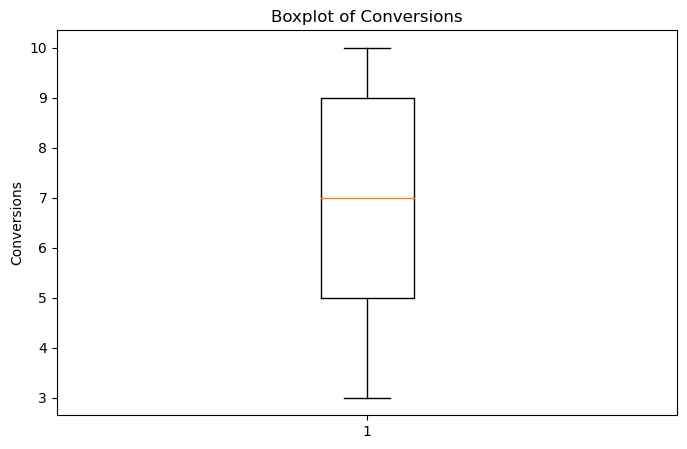

In [43]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['Conversions'].dropna())
plt.title("Boxplot of Conversions")
plt.ylabel("Conversions")
plt.show()

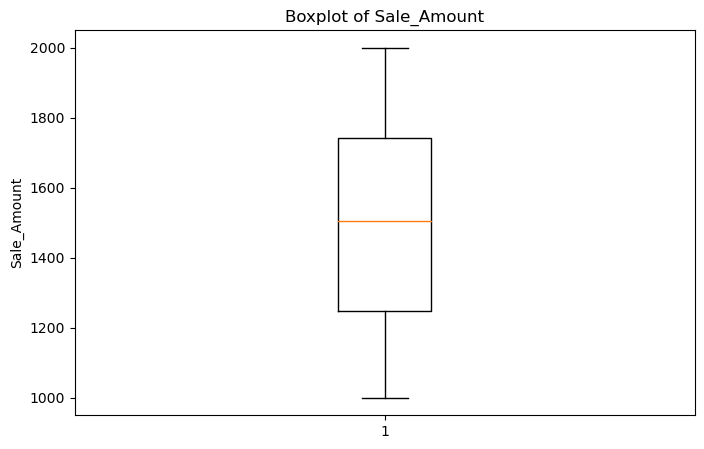

In [44]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['Sale_Amount'].dropna())
plt.title("Boxplot of Sale_Amount")
plt.ylabel("Sale_Amount")
plt.show()

In [45]:
print('Min:', df['Sale_Amount'].min())
print('Max:',df['Sale_Amount'].max())
print('Median:',df['Sale_Amount'].median())

Min: 1000.0
Max: 2000.0
Median: 1505.0


In [46]:
# Check null values for both in Conversions and Sale_Amount 
# in order to replace with 0 but found one abnormal row which has Conversion Rate but NaN in Conversions 
NaN_Conver_Sale = df['Conversions'].isnull() & df['Sale_Amount'].isnull()
df.loc[NaN_Conver_Sale]


,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
465,A1465,Data Analytics Course,125,5811,194.92,14,<NA>,0.03,NaN,2024-11-22,Hyderabad,Tablet,data analytics training,USD
1221,A2221,Data Analytics Course,83,5066,236.91,22,<NA>,NaN,NaN,2024-11-21,Hyderabad,Desktop,learn data analytics,USD
1565,A2565,Data Analytics Course,17,4896,207.51,17,<NA>,NaN,NaN,2024-11-11,Hyderabad,Mobile,data analytics online,USD
2026,A3026,Data Analytics Course,160,5642,200.82,25,<NA>,NaN,NaN,2024-11-29,Hyderabad,Mobile,learn data analytics,USD


In [47]:
# Check to sure the no.of rows
print(df.loc[NaN_Conver_Sale].shape[0])

4


In [48]:
# Check the abnormal line again
df[df['Ad_ID'] == 'A1465']

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
465,A1465,Data Analytics Course,125,5811,194.92,14,<NA>,0.03,NaN,2024-11-22,Hyderabad,Tablet,data analytics training,USD


In [49]:
print(df['Conversion Rate'].dtype)

float64


In [50]:
# Modify the NaN value in abonormal line in Conversions
fliter = df['Ad_ID'] == 'A1465'

df.loc[ fliter , 'Conversions' ]= (df.loc[fliter,'Conversion Rate'] * df.loc[fliter,'Clicks']).round().astype('Int64') 
df[df['Ad_ID'] == 'A1465']





,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
465,A1465,Data Analytics Course,125,5811,194.92,14,4,0.03,NaN,2024-11-22,Hyderabad,Tablet,data analytics training,USD


In [51]:
# Check NaN values and modify them 
fliter_1 = df['Ad_ID'].isin(['A2221', 'A2565', 'A3026'])
columns = ['Conversions', 'Conversion Rate', 'Sale_Amount']

df.loc[fliter_1, columns] = df.loc[fliter_1, columns].fillna(0)
df.loc[fliter_1]

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
1221,A2221,Data Analytics Course,83,5066,236.91,22,0,0.0,0.0,2024-11-21,Hyderabad,Desktop,learn data analytics,USD
1565,A2565,Data Analytics Course,17,4896,207.51,17,0,0.0,0.0,2024-11-11,Hyderabad,Mobile,data analytics online,USD
2026,A3026,Data Analytics Course,160,5642,200.82,25,0,0.0,0.0,2024-11-29,Hyderabad,Mobile,learn data analytics,USD


In [52]:
# Check NaN values
df[df['Sale_Amount'].isnull()]

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
34,A1034,Data Analytics Course,121,5610,214.96,23,8,0.066116,NaN,2024-11-25,Hyderabad,Mobile,data analytics course,USD
59,A1059,Data Analytics Course,179,3025,238.81,17,3,0.017000,NaN,2024-11-11,Hyderabad,Mobile,data analytics online,USD
72,A1072,Data Analytics Course,133,3728,199.13,11,10,0.075188,NaN,2024-11-09,Hyderabad,Desktop,data analytics online,USD
82,A1082,Data Analytics Course,149,3587,217.53,23,8,0.053691,NaN,2024-11-17,Hyderabad,Mobile,data analytics online,USD
103,A1103,Data Analytics Course,119,5800,221.36,11,8,0.067227,NaN,2024-11-29,Hyderabad,Desktop,analytics for data,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,A3462,Data Analytics Course,172,4441,209.18,17,10,0.043000,NaN,2024-11-29,Hyderabad,Desktop,data analytics online,USD
2484,A3484,Data Analytics Course,168,5384,235.64,28,3,0.018000,NaN,2024-11-16,Hyderabad,Mobile,data analytics course,USD
2501,A3501,Data Analytics Course,157,3164,227.73,20,3,0.034000,NaN,2024-11-20,Hyderabad,Mobile,data analytics training,USD
2508,A3508,Data Analytics Course,163,4813,190.77,22,8,0.049000,NaN,2024-11-25,Hyderabad,Desktop,online data analytics,USD


In [53]:
# Check NaN Values
df[df['Conversions'].isnull() & df['Sale_Amount'].notnull()]

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
148,A1148,Data Analytics Course,180,4326,221.67,13,<NA>,NaN,1427.0,2024-11-06,Hyderabad,Tablet,online data analytics,USD
211,A1211,Data Analytics Course,101,3241,183.34,24,<NA>,NaN,1483.0,2024-11-10,Hyderabad,Tablet,data analytics training,USD
213,A1213,Data Analytics Course,199,5734,247.99,18,<NA>,NaN,1455.0,2024-11-11,Hyderabad,Desktop,data analytics online,USD
229,A1229,Data Analytics Course,165,4551,185.35,30,<NA>,NaN,1662.0,2024-11-06,Hyderabad,Desktop,data analytics online,USD
233,A1233,Data Analytics Course,161,5977,193.27,24,<NA>,NaN,1366.0,2024-11-13,Hyderabad,Desktop,online data analytics,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,A3533,Data Analytics Course,130,5340,221.95,27,<NA>,NaN,1488.0,2024-11-02,Hyderabad,Tablet,data analytics online,USD
2543,A3543,Data Analytics Course,158,3766,222.89,27,<NA>,0.056,1673.0,2024-11-22,Hyderabad,Mobile,learn data analytics,USD
2560,A3560,Data Analytics Course,170,3401,235.70,10,<NA>,NaN,1047.0,2024-11-15,Hyderabad,Mobile,online data analytics,USD
2566,A3566,Data Analytics Course,160,5975,212.18,14,<NA>,NaN,1507.0,2024-11-04,Hyderabad,Tablet,data analytics course,USD


In [54]:
fliter_Sale_Conver = df['Conversions'].notnull() & df['Sale_Amount'].isnull() # Check for abnormal rows


df.loc[fliter_Sale_Conver, 'Sale_Amount'] = df['Sale_Amount'].mean() # Modify
df['Sale_Amount'] = df['Sale_Amount'].round(0) # making zero decimal but float cuz round returns as float


df.loc[fliter_Sale_Conver] # print only true rows 


,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
34,A1034,Data Analytics Course,121,5610,214.96,23,8,0.066116,1497.0,2024-11-25,Hyderabad,Mobile,data analytics course,USD
59,A1059,Data Analytics Course,179,3025,238.81,17,3,0.017000,1497.0,2024-11-11,Hyderabad,Mobile,data analytics online,USD
72,A1072,Data Analytics Course,133,3728,199.13,11,10,0.075188,1497.0,2024-11-09,Hyderabad,Desktop,data analytics online,USD
82,A1082,Data Analytics Course,149,3587,217.53,23,8,0.053691,1497.0,2024-11-17,Hyderabad,Mobile,data analytics online,USD
103,A1103,Data Analytics Course,119,5800,221.36,11,8,0.067227,1497.0,2024-11-29,Hyderabad,Desktop,analytics for data,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,A3462,Data Analytics Course,172,4441,209.18,17,10,0.043000,1497.0,2024-11-29,Hyderabad,Desktop,data analytics online,USD
2484,A3484,Data Analytics Course,168,5384,235.64,28,3,0.018000,1497.0,2024-11-16,Hyderabad,Mobile,data analytics course,USD
2501,A3501,Data Analytics Course,157,3164,227.73,20,3,0.034000,1497.0,2024-11-20,Hyderabad,Mobile,data analytics training,USD
2508,A3508,Data Analytics Course,163,4813,190.77,22,8,0.049000,1497.0,2024-11-25,Hyderabad,Desktop,online data analytics,USD


In [55]:
df['Sale_Amount'].isnull().sum() # Check NaN rows

0

In [56]:
df['Sale_Amount'].unique() 

array([1892., 1679., 1624., 1225., 1091., 1315., 1640., 1509., 1362.,
       1029., 1900., 1130., 1959., 1623., 1538., 1755., 1614., 1693.,
       1785., 1516., 1735., 1803., 1322., 1452., 1652., 1456., 1656.,
       1688., 1783., 1975., 1590., 1111., 1041., 1710., 1497., 1824.,
       1833., 1307., 1704., 1427., 1849., 1209., 1634., 1960., 1729.,
       1585., 1303., 1835., 1367., 1524., 1080., 1746., 1026., 1564.,
       1902., 1267., 1340., 1692., 1054., 1219., 1946., 1963., 1348.,
       1264., 1771., 1337., 1287., 1922., 1556., 1728., 1554., 1994.,
       1618., 1086., 1364., 1836., 1932., 1038., 1327., 1467., 1174.,
       1057., 1199., 1966., 1194., 1821., 1731., 1859., 1188., 1496.,
       1645., 1915., 1839., 1036., 1052., 1092., 1909., 1944., 1867.,
       1505., 1842., 1116., 1501., 1894., 1179., 1838., 1094., 1344.,
       1434., 1766., 1220., 1123., 1982., 1140., 1962., 1172., 1699.,
       1423., 1299., 1248., 1495., 1089., 1013., 1243., 1767., 1048.,
       1566., 1753.,

In [57]:
df['Sale_Amount'].isnull().sum()

0

In [58]:
df.isnull().sum()

Ad_ID                0
Campaign_Name        0
Clicks               3
Impressions         54
Cost                97
Leads                3
Conversions         70
Conversion Rate    150
Sale_Amount          0
Ad_Date              0
Location             0
Device               0
Keyword              0
Currency             0
dtype: int64

In [59]:
print('Min: ', df['Conversions'].min()) # Check Outliers
print('Max: ', df['Conversions'].max())

Min:  0
Max:  10


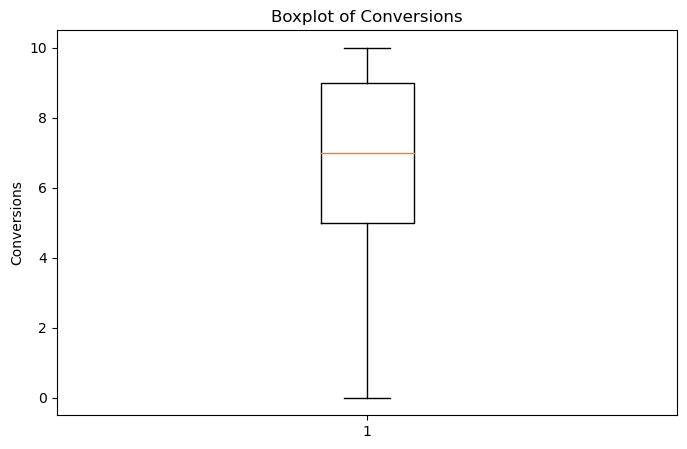

In [60]:
plt.figure(figsize=(8, 5)) # Check outliers with visualization
plt.boxplot(df['Conversions'].dropna())
plt.title("Boxplot of Conversions")
plt.ylabel("Conversions")
plt.show()

In [61]:
df[df['Conversions'].isnull()]

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
148,A1148,Data Analytics Course,180,4326,221.67,13,<NA>,NaN,1427.0,2024-11-06,Hyderabad,Tablet,online data analytics,USD
211,A1211,Data Analytics Course,101,3241,183.34,24,<NA>,NaN,1483.0,2024-11-10,Hyderabad,Tablet,data analytics training,USD
213,A1213,Data Analytics Course,199,5734,247.99,18,<NA>,NaN,1455.0,2024-11-11,Hyderabad,Desktop,data analytics online,USD
229,A1229,Data Analytics Course,165,4551,185.35,30,<NA>,NaN,1662.0,2024-11-06,Hyderabad,Desktop,data analytics online,USD
233,A1233,Data Analytics Course,161,5977,193.27,24,<NA>,NaN,1366.0,2024-11-13,Hyderabad,Desktop,online data analytics,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,A3533,Data Analytics Course,130,5340,221.95,27,<NA>,NaN,1488.0,2024-11-02,Hyderabad,Tablet,data analytics online,USD
2543,A3543,Data Analytics Course,158,3766,222.89,27,<NA>,0.056,1673.0,2024-11-22,Hyderabad,Mobile,learn data analytics,USD
2560,A3560,Data Analytics Course,170,3401,235.70,10,<NA>,NaN,1047.0,2024-11-15,Hyderabad,Mobile,online data analytics,USD
2566,A3566,Data Analytics Course,160,5975,212.18,14,<NA>,NaN,1507.0,2024-11-04,Hyderabad,Tablet,data analytics course,USD


In [62]:
fliter_2 = df['Conversions'].isnull() & df['Conversion Rate'].notnull() # Check abnormal rows 

print(df.loc[fliter_2])
print('No.of rows: ', df.loc[fliter_2].shape[0])

      Ad_ID          Campaign_Name  Clicks  Impressions    Cost  Leads  \
620   A1620  Data Analytics Course     179         3685  202.66     15   
1023  A2023  Data Analytics Course     138         3002  246.30     24   
1235  A2235  Data Analytics Course     104         3696  206.54     28   
1619  A2619  Data Analytics Course     189         3215  224.53     23   
1629  A2629  Data Analytics Course     128         4787  204.29   <NA>   
1681  A2681  Data Analytics Course     120         3629  197.43     12   
2192  A3192  Data Analytics Course     199         3754  220.16     26   
2404  A3404  Data Analytics Course     132         5845  249.74     19   
2493  A3493  Data Analytics Course     169         5430  233.01     27   
2543  A3543  Data Analytics Course     158         3766  222.89     27   

      Conversions  Conversion Rate  Sale_Amount    Ad_Date   Location  \
620          <NA>            0.039       1634.0 2024-11-18  Hyderabad   
1023         <NA>            0.036     

In [63]:
print(df.loc[fliter_2, 'Ad_ID']) # Print only one column, Ad_ID

620     A1620
1023    A2023
1235    A2235
1619    A2619
1629    A2629
1681    A2681
2192    A3192
2404    A3404
2493    A3493
2543    A3543
Name: Ad_ID, dtype: object


In [64]:
# Modify those rows
fliter_3 = df['Ad_ID'].isin(['A1620','A2023','A2235','A2619','A2629','A2681','A3192','A3404','A3493','A3543'])

df.loc[ fliter_3 , 'Conversions' ]= (df.loc[fliter_3,'Conversion Rate'] * df.loc[fliter_3,'Clicks']).round().astype('Int64') 
df.loc[ fliter_3]

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
620,A1620,Data Analytics Course,179,3685,202.66,15,7,0.039,1634.0,2024-11-18,Hyderabad,Desktop,data analytics course,USD
1023,A2023,Data Analytics Course,138,3002,246.30,24,5,0.036,1530.0,2024-11-01,Hyderabad,Tablet,learn data analytics,USD
1235,A2235,Data Analytics Course,104,3696,206.54,28,6,0.053,1985.0,2024-11-11,Hyderabad,Desktop,data analytics training,USD
1619,A2619,Data Analytics Course,189,3215,224.53,23,10,0.052,1309.0,2024-11-15,Hyderabad,Desktop,online data analytics,USD
1629,A2629,Data Analytics Course,128,4787,204.29,<NA>,8,0.059,1880.0,2024-11-29,Hyderabad,Desktop,data analytics training,USD
1681,A2681,Data Analytics Course,120,3629,197.43,12,6,0.053,1522.0,2024-11-23,Hyderabad,Desktop,data analytics training,USD
2192,A3192,Data Analytics Course,199,3754,220.16,26,9,0.045,1262.0,2024-11-20,Hyderabad,Tablet,data analytics course,USD
2404,A3404,Data Analytics Course,132,5845,249.74,19,7,0.050,1067.0,2024-11-03,Hyderabad,Mobile,analytics for data,USD
2493,A3493,Data Analytics Course,169,5430,233.01,27,9,0.053,2000.0,2024-11-10,Hyderabad,Mobile,learn data analytics,USD
2543,A3543,Data Analytics Course,158,3766,222.89,27,9,0.056,1673.0,2024-11-22,Hyderabad,Mobile,learn data analytics,USD


In [65]:
df['Conversions'].isnull().sum() # Check NaN

60

In [66]:
df[df['Conversions'].isnull()]

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
148,A1148,Data Analytics Course,180,4326,221.67,13,<NA>,NaN,1427.0,2024-11-06,Hyderabad,Tablet,online data analytics,USD
211,A1211,Data Analytics Course,101,3241,183.34,24,<NA>,NaN,1483.0,2024-11-10,Hyderabad,Tablet,data analytics training,USD
213,A1213,Data Analytics Course,199,5734,247.99,18,<NA>,NaN,1455.0,2024-11-11,Hyderabad,Desktop,data analytics online,USD
229,A1229,Data Analytics Course,165,4551,185.35,30,<NA>,NaN,1662.0,2024-11-06,Hyderabad,Desktop,data analytics online,USD
233,A1233,Data Analytics Course,161,5977,193.27,24,<NA>,NaN,1366.0,2024-11-13,Hyderabad,Desktop,online data analytics,USD
304,A1304,Data Analytics Course,162,5915,211.96,11,<NA>,NaN,1394.0,2024-11-20,Hyderabad,Tablet,analytics for data,USD
345,A1345,Data Analytics Course,25,3705,239.26,25,<NA>,NaN,1506.0,2024-11-02,Hyderabad,Tablet,online data analytics,USD
459,A1459,Data Analytics Course,128,4532,183.28,11,<NA>,NaN,1571.0,2024-11-25,Hyderabad,Desktop,data analytics training,USD
520,A1520,Data Analytics Course,127,5964,182.01,26,<NA>,NaN,1490.0,2024-11-25,Hyderabad,Desktop,data analytics course,USD
600,A1600,Data Analytics Course,142,5999,214.05,27,<NA>,NaN,1064.0,2024-11-21,Hyderabad,Desktop,analytics for data,USD


In [67]:
# Check abnormal rows and Modify them 
Conver_null_Sale_notnull = df['Conversions'].isnull() & df['Sale_Amount'].notnull()

df.loc[Conver_null_Sale_notnull, 'Conversions'] = df['Conversions'].mean().round()
print('No.of null rows Conversions: ', df['Conversions'].isnull().sum())
print(df['Conversions'].mean().round())


No.of null rows Conversions:  0
7.0


In [68]:
# Change the data type and check unique
df['Conversions'].astype('Int64')
df['Conversions'].unique()

<IntegerArray>
[7, 8, 9, 6, 5, 3, 4, 10, 0]
Length: 9, dtype: Int64

In [69]:
df.isnull().sum()

Ad_ID                0
Campaign_Name        0
Clicks               3
Impressions         54
Cost                97
Leads                3
Conversions          0
Conversion Rate    150
Sale_Amount          0
Ad_Date              0
Location             0
Device               0
Keyword              0
Currency             0
dtype: int64

In [70]:
# Check abnormal rows
Impre_Clicks = df[df['Impressions'].isnull() & df['Clicks'].notnull()]
print(Impre_Clicks)
print('Rows: ', Impre_Clicks.shape[0])


      Ad_ID          Campaign_Name  Clicks  Impressions    Cost  Leads  \
114   A1114  Data Analytics Course      91         <NA>  203.52      9   
120   A1120  Data Analytics Course     117         <NA>  214.18     29   
160   A1160  Data Analytics Course     160         <NA>  245.87     11   
210   A1210  Data Analytics Course     199         <NA>  199.98     15   
232   A1232  Data Analytics Course     101         <NA>  234.17     29   
294   A1294  Data Analytics Course      90         <NA>  249.00     21   
398   A1398  Data Analytics Course     163         <NA>  206.46     14   
446   A1446  Data Analytics Course     145         <NA>  236.03     24   
468   A1468  Data Analytics Course     181         <NA>  208.33     22   
471   A1471  Data Analytics Course      83         <NA>  229.97     12   
561   A1561  Data Analytics Course     196         <NA>  206.31     24   
571   A1571  Data Analytics Course     147         <NA>  205.83     25   
574   A1574  Data Analytics Course    

In [71]:
# Check Outliers
print('Min: ',df['Impressions'].min())
print('Max: ',df['Impressions'].max())

Min:  3000
Max:  5999


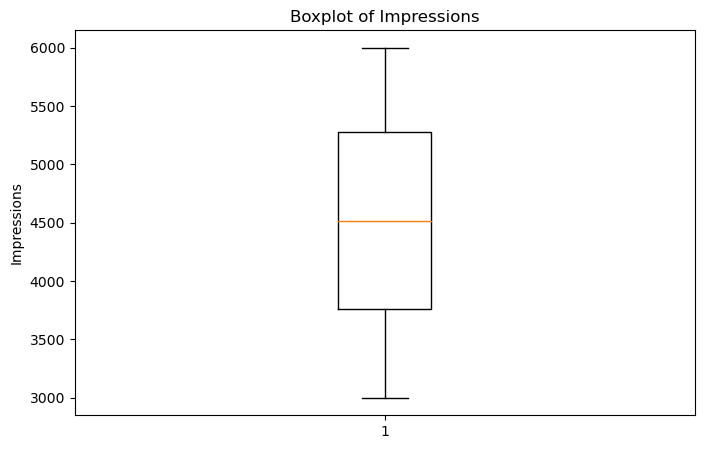

In [72]:
# Check outliers with visualization 
plt.figure(figsize=(8,5))
plt.boxplot(df['Impressions'].dropna())
plt.title("Boxplot of Impressions")
plt.ylabel("Impressions")
plt.show()


In [73]:
Impre_Clicks = df['Impressions'].isnull() & df['Clicks'].notnull()
# Modify those abnormal rows
df.loc[Impre_Clicks, 'Impressions'] = df['Impressions'].mean().round()
print('Rows: ',df['Impressions'].isnull().sum())
print(sorted(df['Impressions'].unique()))
print('Mean: ', df['Impressions'].mean())

Rows:  0
[3000, 3001, 3002, 3003, 3005, 3006, 3007, 3008, 3009, 3011, 3013, 3014, 3015, 3017, 3021, 3022, 3024, 3025, 3026, 3027, 3029, 3030, 3031, 3036, 3039, 3042, 3047, 3048, 3050, 3051, 3052, 3053, 3055, 3057, 3058, 3060, 3061, 3063, 3064, 3068, 3069, 3071, 3072, 3075, 3076, 3077, 3085, 3087, 3088, 3089, 3091, 3092, 3095, 3096, 3097, 3099, 3101, 3102, 3104, 3105, 3109, 3110, 3112, 3113, 3115, 3117, 3118, 3120, 3122, 3123, 3124, 3126, 3128, 3131, 3139, 3142, 3143, 3144, 3146, 3147, 3148, 3149, 3150, 3153, 3154, 3155, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3169, 3172, 3174, 3177, 3178, 3180, 3181, 3185, 3186, 3187, 3188, 3190, 3192, 3196, 3198, 3199, 3202, 3205, 3207, 3208, 3211, 3212, 3215, 3217, 3218, 3219, 3220, 3221, 3224, 3225, 3226, 3231, 3234, 3235, 3237, 3238, 3239, 3240, 3241, 3243, 3245, 3246, 3248, 3249, 3251, 3253, 3256, 3259, 3261, 3263, 3265, 3268, 3269, 3271, 3272, 3273, 3274, 3278, 3281, 3282, 3285, 3286, 3289, 3292, 3296, 3299, 3300, 3302, 3303, 3305, 3306, 

In [74]:
df.isnull().sum()

Ad_ID                0
Campaign_Name        0
Clicks               3
Impressions          0
Cost                97
Leads                3
Conversions          0
Conversion Rate    150
Sale_Amount          0
Ad_Date              0
Location             0
Device               0
Keyword              0
Currency             0
dtype: int64

In [75]:
# Check Abnormal Rows
Clicks_null = df[df['Clicks'].isnull() & df['Leads'].notnull()]
print(Clicks_null)

      Ad_ID          Campaign_Name  Clicks  Impressions    Cost  Leads  \
1478  A2478  Data Analytics Course    <NA>         3009  195.17      6   
1890  A2890  Data Analytics Course    <NA>         3027  205.67      7   
2053  A3053  Data Analytics Course    <NA>         5470  210.97      7   

      Conversions  Conversion Rate  Sale_Amount    Ad_Date   Location  \
1478            6              NaN       1083.0 2024-11-23  Hyderabad   
1890            7              NaN       1593.0 2024-11-07  Hyderabad   
2053            7              NaN       1928.0 2024-11-21  Hyderabad   

       Device                Keyword Currency  
1478   Tablet  data analytics online      USD  
1890   Tablet   learn data analytics      USD  
2053  Desktop  data analytics online      USD  


In [76]:
# Check Outliers
print('Min: ',df['Clicks'].min())
print('Max: ',df['Clicks'].max())

Min:  10
Max:  199


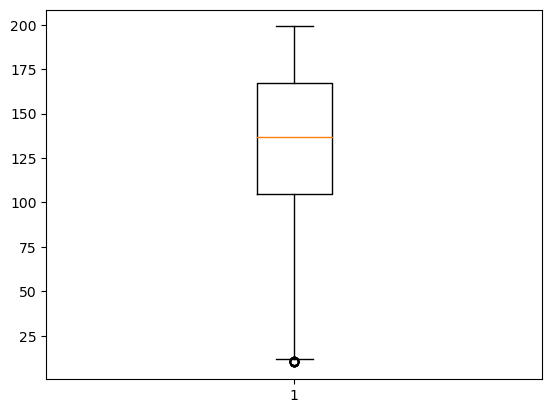

In [77]:
# Check Outliers with Visualization
plt.boxplot(df['Clicks'].dropna())
plt.show()

In [78]:
# Modify NaN values in Clicks with median
df['Clicks'] = df['Clicks'].fillna(df['Clicks'].median())
print(df['Clicks'].isnull().sum())

0


In [79]:
# Modify NaN values in Conversion Rate 
df['Conversion Rate'] = df['Conversion Rate'].fillna(df['Conversions'] / df['Clicks'])
print(df['Conversion Rate'].isnull().sum())

0


In [80]:
df[df['Cost'].isnull()]

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
8,A1008,Data Analytics Course,113,5434,NaN,27,4,0.058000,1362.0,2024-11-24,Hyderabad,Tablet,data analytics training,USD
16,A1016,Data Analytics Course,193,5159,NaN,15,9,0.047000,1614.0,2024-11-10,Hyderabad,Mobile,learn data analytics,USD
19,A1019,Data Analytics Course,145,5278,NaN,25,6,0.041000,1516.0,2024-11-05,Hyderabad,Desktop,data analytics course,USD
24,A1024,Data Analytics Course,87,3718,NaN,12,3,0.034000,1652.0,2024-11-20,Hyderabad,Tablet,learn data analytics,USD
37,A1037,Data Analytics Course,123,5131,NaN,19,5,0.041000,1307.0,2024-11-09,Hyderabad,Mobile,learn data analytics,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,A3497,Data Analytics Course,135,4611,NaN,17,7,0.051852,1697.0,2024-11-14,Hyderabad,Desktop,online data analytics,USD
2522,A3522,Data Analytics Course,127,3682,NaN,21,9,0.071000,1384.0,2024-11-22,Hyderabad,Tablet,data analytics training,USD
2528,A3528,Data Analytics Course,132,5616,NaN,28,7,0.053000,1491.0,2024-11-26,Hyderabad,Desktop,data analytics online,USD
2581,A3581,Data Analytics Course,27,5297,NaN,27,9,0.333333,1268.0,2024-11-23,Hyderabad,Desktop,data analytics course,USD


In [81]:
# Check Outliers
print('Min: ',df['Cost'].min())
print('Max: ',df['Cost'].max())

Min:  180.01
Max:  249.89


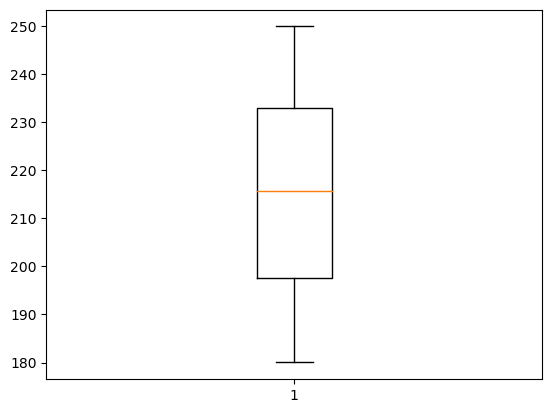

In [82]:
# Check Outliers with Visualization
plt.boxplot(df['Cost'].dropna())
plt.show()

In [83]:
# Modify NaN values in Cost with mean
df['Cost'] = df['Cost'].fillna(df['Cost'].mean())
print(df['Cost'].isnull().sum())

0


In [84]:
df.isnull().sum()

Ad_ID              0
Campaign_Name      0
Clicks             0
Impressions        0
Cost               0
Leads              3
Conversions        0
Conversion Rate    0
Sale_Amount        0
Ad_Date            0
Location           0
Device             0
Keyword            0
Currency           0
dtype: int64

In [85]:
df[df['Leads'].isnull()]

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
1629,A2629,Data Analytics Course,128,4787,204.29,<NA>,8,0.059000,1880.0,2024-11-29,Hyderabad,Desktop,data analytics training,USD
2110,A3110,Data Analytics Course,83,3684,203.47,<NA>,7,0.084337,1805.0,2024-11-17,Hyderabad,Tablet,data analytics course,USD
2267,A3267,Data Analytics Course,167,5824,204.18,<NA>,7,0.041916,1452.0,2024-11-09,Hyderabad,Mobile,data analytics course,USD


In [86]:
# Check Outliers
print('Min: ',df['Leads'].min())
print('Max: ',df['Leads'].max())

Min:  3
Max:  30


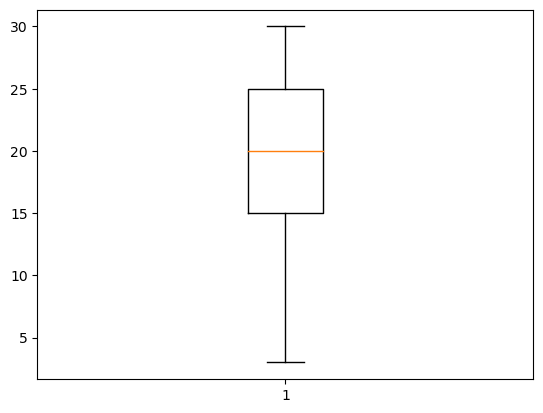

In [87]:
# Check Outliers with Visualization
plt.boxplot(df['Leads'].dropna())
plt.show()

In [88]:
df['Leads'].mean()

19.777820562187138

In [89]:
df['Leads'].dtype

Int64Dtype()

In [90]:
leads_float = df['Leads'].astype('float')

leads_filled = leads_float.fillna(df['Leads'].mean()).round(0)

df['Leads'] = leads_filled.astype('Int64')

print(df['Leads'].isnull().sum())

0


In [91]:
df.isnull().sum()


Ad_ID              0
Campaign_Name      0
Clicks             0
Impressions        0
Cost               0
Leads              0
Conversions        0
Conversion Rate    0
Sale_Amount        0
Ad_Date            0
Location           0
Device             0
Keyword            0
Currency           0
dtype: int64

In [92]:
# Check to ensure abnormal data 
check = df.loc[df['Clicks'] > df['Impressions']]
print(check)

Empty DataFrame
Columns: [Ad_ID, Campaign_Name, Clicks, Impressions, Cost, Leads, Conversions, Conversion Rate, Sale_Amount, Ad_Date, Location, Device, Keyword, Currency]
Index: []


In [93]:
# Check to ensure abnormal data 
check_1 = df.loc[df['Leads'] | df['Conversions'] > df['Impressions']]
print(check_1)

Empty DataFrame
Columns: [Ad_ID, Campaign_Name, Clicks, Impressions, Cost, Leads, Conversions, Conversion Rate, Sale_Amount, Ad_Date, Location, Device, Keyword, Currency]
Index: []


In [94]:
print(f"Number of rows to write: {len(df)}")

Number of rows to write: 2600


In [95]:
# Assigning 
user = 'tle'
password = 'demopass'
host = 'localhost'
port = '5432'
database = 'postgres'

In [96]:
# Create connection string
conn_str = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}'
engine = create_engine(conn_str)

In [97]:
# Upload data to sql database
df.to_sql('google_sale_data', engine, if_exists='append', index=False)



600

In [98]:
# Get data from sql database in order to check
sql = "SELECT * FROM public.google_sale_data;"

In [99]:
# Check to ensure
df = pd.read_sql_query(sql,engine)
df.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Currency
0,A1000,Data Analytics Course,104,4498,231.88,14,7,0.058000,1892.0,2024-11-16,Hyderabad,Desktop,learn data analytics,USD
1,A1001,Data Analytics Course,173,5107,216.84,10,8,0.046000,1679.0,2024-11-20,Hyderabad,Mobile,data analytics course,USD
2,A1002,Data Analytics Course,90,4544,203.66,26,9,0.100000,1624.0,2024-11-16,Hyderabad,Desktop,data analytics online,USD
3,A1003,Data Analytics Course,142,3185,237.66,17,6,0.042254,1225.0,2024-11-26,Hyderabad,Tablet,data analytics training,USD
4,A1004,Data Analytics Course,156,3361,195.90,30,8,0.051282,1091.0,2024-11-22,Hyderabad,Desktop,online data analytics,USD


In [100]:
# Install library to export to excel as well but show result that it already exists
!pip install openpyxl

In [101]:
# Export the DataFrame to an Excel file named 'cleaned_data.xlsx'
df.to_excel('C:\Portfolio Project_1\cleaned_google_sale.xlsx', index=False)